In [2]:
import os
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#bmag = pd.read_csv('/Users/Astrophysics/data/B.csv')

# data in apparent magnitudes m
data = pd.read_csv('M12_V.csv')
print(data[:2])

# Isochrones/models in absolute magnitudes M
iso1 = pd.read_csv('t7.5e8.csv')
iso2 = pd.read_csv('t7e9.csv')
iso3 = pd.read_csv('t13e9.csv')

   Number  ApertureRA  ApertureDec  CentroidRA  CentroidDec  ApertureX  \
0       1  251.803662    -1.953681  251.803621    -1.953633        225   
1       2  251.799170    -1.953682  251.799148    -1.953657        306   

   ApertureY  CentroidX  CentroidY  CentroidFlag  ...  ApertureMinorRadius  \
0         12    225.740     12.872             1  ...                    5   
1         12    306.405     12.439             1  ...                    5   

   ApertureRotationAngle  SkyRadiusInner  SkyRadiusOuter ApertureNumPixels  \
0                      0               8              15             79.04   
1                      0               8              15             79.04   

   ApertureNumRejected  SkyNumPixels  RadialProfileFWHM Flags  \
0                    0           478               3.73     0   
1                    0           452               3.37     0   

                                               Image  
0  /Volumes/IsaacPortableSSD/Programming/PHYS3313...  
1

In [4]:
def mag(mags=0, flux=0, fluxs=0):
    return mags-2.5*np.log10(flux/fluxs)

In [5]:
requestedindex = data.iloc[3022] # x = 157 y = 1142 from slides
b_standed = 15.53 # from slides
v_standed = 15.40 # from slides
b_standared_flux = data.iloc[3022]['SourceIntensityB']
v_standed_flux = data.iloc[3022]['SourceIntensityV']

b_fluxes = data['SourceIntensityB']
v_fluxes = data['SourceIntensityV']

# Calculate the absolute magnitude of the star
b_mag = np.array([mag(mags=b_standed, flux=np.abs(flux), fluxs=b_standared_flux) for flux in b_fluxes])
v_mag = np.array([mag(mags=v_standed, flux=flux, fluxs=v_standed_flux) for flux in v_fluxes])

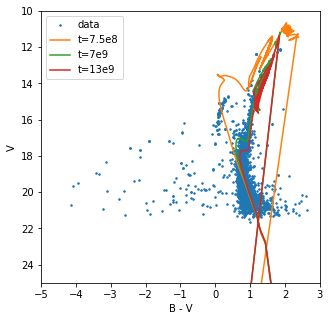

In [6]:
# Distance modulus mu = m - M
# mu = 6.
mu = 13.5

plt.figure(figsize=(5, 5))

# plot data
# plt.plot(data['B1mag']-data['V1mag'], data['V1mag'], '.')
plt.plot(b_mag-v_mag, v_mag, '.', label='data', markersize=3)

# plot models
plt.plot(iso1['Bmag']-iso1['Vmag'], iso1['Vmag']+mu, label='t=7.5e8')
plt.plot(iso2['Bmag']-iso2['Vmag'], iso2['Vmag']+mu, label='t=7e9')
plt.plot(iso3['Bmag']-iso3['Vmag'], iso3['Vmag']+mu, label='t=13e9')

plt.xlabel('B - V')
plt.ylabel('V')
plt.xlim(-5, 3)
plt.ylim(25, 10)
plt.legend()
plt.show()


In [10]:
print('Distance to M12 cluster:', round(10**(mu/5+1),1), 'pc')
print(f"Age of M12 cluster: {iso2['Age'][0]} years")

Distance to M12 cluster: 5011.9 pc
Age of M12 cluster: 7.00e+09 years
